# Network queries

veneer-py supports a number topological queries on the Source node-link network and including identifying outlets, upstream and downstream nodes, links and catchments.

These queries operate on the network object returned by `v.network()`. The topological queriers are _not_ available on the dataframe version (created with `.as_dataframe()`), although in some cases the results of the previous queries can be carried over to the dataframe.

In [10]:
import veneer
%matplotlib inline

In [2]:
v = veneer.Veneer()

## Different forms of the network.

The node-link network that we get from Source includes topological information, in addition to the geometries of the various nodes, links and catchments, and their attributes, such as node names.

When we initial retrieve the network, with `v.network()` we get an object that includes a number of queries based on this topology.

**Note:** These queries are not implemented on the dataframe of the network, created with `v.network().as_dataframe()`. However you can call `as_dataframe()` on the result of some of the topological queries.

In [4]:
network = v.network()

### eg, find all outlet nodes

In [5]:
outlets = network.outlet_nodes().as_dataframe()
outlets[:10]

,feature_type,geometry,icon,name,id
0,node,POINT (350180 5768600),/resources/ConfluenceNodeModel,Outlet Node1,/network/nodes/187
1,node,POINT (358140 5769280),/resources/ConfluenceNodeModel,Outlet Node2,/network/nodes/198
2,node,POINT (363720 5768780),/resources/ConfluenceNodeModel,Toomuc Ck Outlet,/network/nodes/205
3,node,POINT (367740 5767240),/resources/ConfluenceNodeModel,Yallock Ck Outlet,/network/nodes/214
4,node,POINT (347580 5768100),/resources/ConfluenceNodeModel,Outlet Node5,/network/nodes/215
5,node,POINT (348880 5768520),/resources/ConfluenceNodeModel,Outlet Node6,/network/nodes/224
6,node,POINT (366400 5767620),/resources/ConfluenceNodeModel,Outlet Node7,/network/nodes/228
7,node,POINT (357480 5769580),/resources/ConfluenceNodeModel,Outlet Node8,/network/nodes/237
8,node,POINT (363020 5769140),/resources/ConfluenceNodeModel,Cardinia Ck Outlet,/network/nodes/242
9,node,POINT (364540 5768780),/resources/ConfluenceNodeModel,Bunyip R Outlet,/network/nodes/247


# Feature `id`

Other topological queries are based on the `id` attribute of features in the network. For example `/network/nodes/187`

In [8]:
upstream_features = network.upstream_features('/network/nodes/214').as_dataframe()
upstream_features

,areaInSquareMeters,feature_type,from_node,geometry,icon,length,link,name,to_node,id
0,NaN,link,/network/nodes/212,"LINESTRING (373480 5771840, 367740 5767240)",NaN,9195.676759,NaN,link for catchment SC #203,/network/nodes/214,/network/link/199
1,8171200.0,catchment,NaN,"(POLYGON ((374010 5773170, 374070 5773170, 374...",NaN,NaN,/network/link/199,SC #203,NaN,/network/catchments/21253
2,NaN,node,NaN,POINT (373480 5771840),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #203,NaN,/network/nodes/212
3,NaN,link,/network/nodes/175,"LINESTRING (375140 5773220, 373480 5771840)",NaN,2414.213562,NaN,link for catchment SC #199,/network/nodes/212,/network/link/195
4,NaN,link,/network/nodes/220,"LINESTRING (377680 5770860, 373480 5771840)",NaN,5214.701295,NaN,link for catchment SC #208,/network/nodes/212,/network/link/204
5,1570800.0,catchment,NaN,"(POLYGON ((375210 5773530, 375250 5773530, 375...",NaN,NaN,/network/link/195,SC #199,NaN,/network/catchments/2500
6,NaN,node,NaN,POINT (375140 5773220),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #199,NaN,/network/nodes/175
7,NaN,link,/network/nodes/176,"LINESTRING (375500 5773700, 375140 5773220)",NaN,600.832611,NaN,link for catchment SC #163,/network/nodes/175,/network/link/159
8,NaN,link,/network/nodes/191,"LINESTRING (375360 5773280, 375140 5773220)",NaN,224.852814,NaN,link for catchment SC #200,/network/nodes/175,/network/link/196
9,5260400.0,catchment,NaN,"(POLYGON ((380610 5777870, 380630 5777870, 380...",NaN,NaN,/network/link/159,SC #163,NaN,/network/catchments/8029


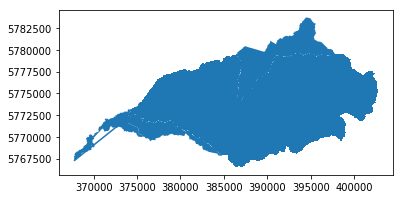

In [13]:
upstream_features.plot()

## Partitioning the network

The `network.partition` method can be very useful for a range of parameterisation and reporting needs.

`partition` groups all features (nodes, links and catchments) in the network based on which of a series of key nodes those features drain through.

`parition` adds a new property to each feature, naming the relevant key node (or the outlet node if none of the key nodes are downstream of a particular feature).

**Note:** You can name the property used to identify the key nodes, which means you can run `partition` multiple times to identify different groupings within the network

In [14]:
network.partition?

Signature: network.partition(key_features, new_prop)
Docstring:
Partition the network by a list of feature names (key_features).

Add property (new_prop) to each feature identifying next downstream feature from key_features.

Features in key_features are assigned to their own group.

Features with no downstream key_feature (eg close to outlets) are attributed with their outlet node
File:      ~/src/projects/py/veneer-py/veneer/extensions.py
Type:      method


In [18]:
gauge_names = network['features'].find_by_icon('/resources/GaugeNodeModel')._select(['name'])
gauge_names

['228212_BunyipR_Tonimbuk',
 '228217_ToomucCk_PrincesHwy',
 '228228_CardiniaCk_ChasemoreRd',
 '228255_BunyipR_CannibalCk',
 '228201_TaragoR_DrouinWest',
 '228213_BunyipR_Iona',
 '227219_BassR_Loch',
 '227231_BassR_McGrathsRd',
 '228208_LangLangR_LangLang',
 '228209_LangLang_HamiltonsBrRd']

In [20]:
network.partition(gauge_names,'downstream_gauge')

In [22]:
dataframe = network.as_dataframe()
dataframe[:10]

,areaInSquareMeters,downstream_gauge,feature_type,from_node,geometry,icon,length,link,name,to_node,id
0,NaN,228212_BunyipR_Tonimbuk,node,NaN,POINT (385780 5803320),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #003,NaN,/network/nodes/0
1,NaN,228212_BunyipR_Tonimbuk,node,NaN,POINT (384360 5804140),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #001,NaN,/network/nodes/1
2,NaN,228212_BunyipR_Tonimbuk,node,NaN,POINT (385820 5803660),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #002,NaN,/network/nodes/2
3,NaN,228212_BunyipR_Tonimbuk,node,NaN,POINT (389820 5800500),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #016,NaN,/network/nodes/3
4,NaN,228201_TaragoR_DrouinWest,node,NaN,POINT (403700 5799060),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #023,NaN,/network/nodes/4
5,NaN,228201_TaragoR_DrouinWest,node,NaN,POINT (403780 5801580),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #004,NaN,/network/nodes/5
6,NaN,228201_TaragoR_DrouinWest,node,NaN,POINT (400320 5800360),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #014,NaN,/network/nodes/6
7,NaN,228201_TaragoR_DrouinWest,node,NaN,POINT (399000 5801020),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #005,NaN,/network/nodes/7
8,NaN,228212_BunyipR_Tonimbuk,node,NaN,POINT (381760 5799480),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #021,NaN,/network/nodes/8
9,NaN,228212_BunyipR_Tonimbuk,node,NaN,POINT (382240 5800640),/resources/ConfluenceNodeModel,NaN,NaN,Node on catchment SC #006,NaN,/network/nodes/9
